## Histograms
- 공식문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### 도수분포표 vs 히스토그램
- 도수분포표 : 특정 구간에 속하는 자료의 개수를 표현
- 히스토그램 : 도수분포표를 시각화하여 막대그래프로 표현, 하지만 bar plot과는 다름(막대그래프는 계급 즉 가로를 생각하지 않고 세로의 높이로만 나타낸다)

### 막대그래프 vs 히스토그램 (bar plot vs hist plot)
- bar plot : 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대로 범주형 데이터를 표현하는 차트나 그래프, 합계, 평균 등의 수치를 시각화
- hist plot : 구간별 빈도수를 표현

### 히스토그램 vs 정규분포 (hist plot vs density plot)
- hist plot : 구간별 빈도수
- density pl|ot : 확률 밀도 함수(확률 변수의 밀도를 표현)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, 
                   columns=['a', 'b', 'c'])
df4.head()

,a,b,c
0,0.231678,-0.647156,-1.063098
1,0.377090,-1.218331,1.556956
2,2.275837,-0.025208,-3.340353
3,-0.143512,-1.330166,-1.293439
4,1.050736,-1.619199,-2.037847


<AxesSubplot:ylabel='Frequency'>

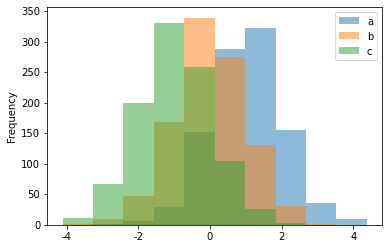

In [3]:
# bin
df4.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

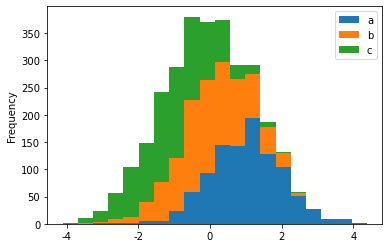

In [4]:
df4.plot.hist(stacked=True, bins=20)

<AxesSubplot:xlabel='Frequency'>

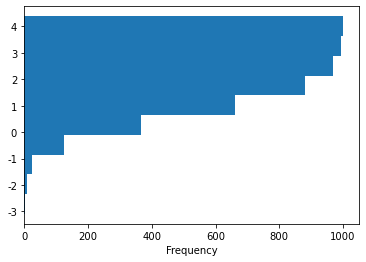

In [5]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

<AxesSubplot:>

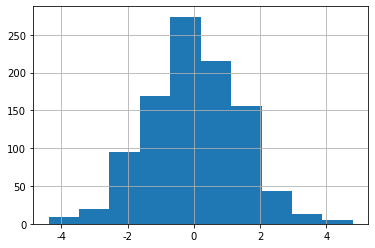

In [6]:
df4['a'].diff().hist()

In [7]:
df4['a_diff'] = df4['a'].diff()
df4['a_shift'] = df4['a'].shift(1)
df4['a_minus'] = df4['a'] - df4['a_shift']
df4[['a', 'a_shift', 'a_minus', 'a_diff']].head()

,a,a_shift,a_minus,a_diff
0,0.231678,NaN,NaN,NaN
1,0.377090,0.231678,0.145412,0.145412
2,2.275837,0.377090,1.898748,1.898748
3,-0.143512,2.275837,-2.419350,-2.419350
4,1.050736,-0.143512,1.194248,1.194248


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

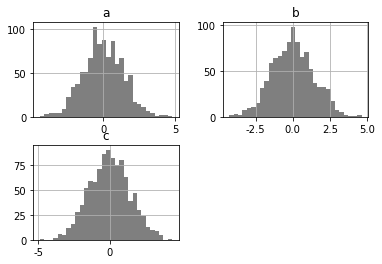

In [8]:
df4[['a', 'b', 'c']].diff().hist(color='k', alpha=0.5, bins=30)

In [9]:
data = pd.Series(np.random.randn(1000))

data = pd.DataFrame({'a' : np.random.randn(1000),
                    'b': np.random.randint(0, 4, 1000) })
data.head()

,a,b
0,0.039705,1
1,-0.989230,2
2,0.374495,1
3,-0.645723,3
4,-0.723020,1


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

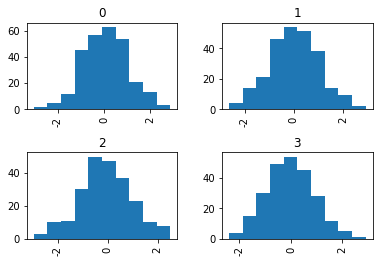

In [10]:
data['a'].hist(by=data['b'], figsize=(6, 4))